In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

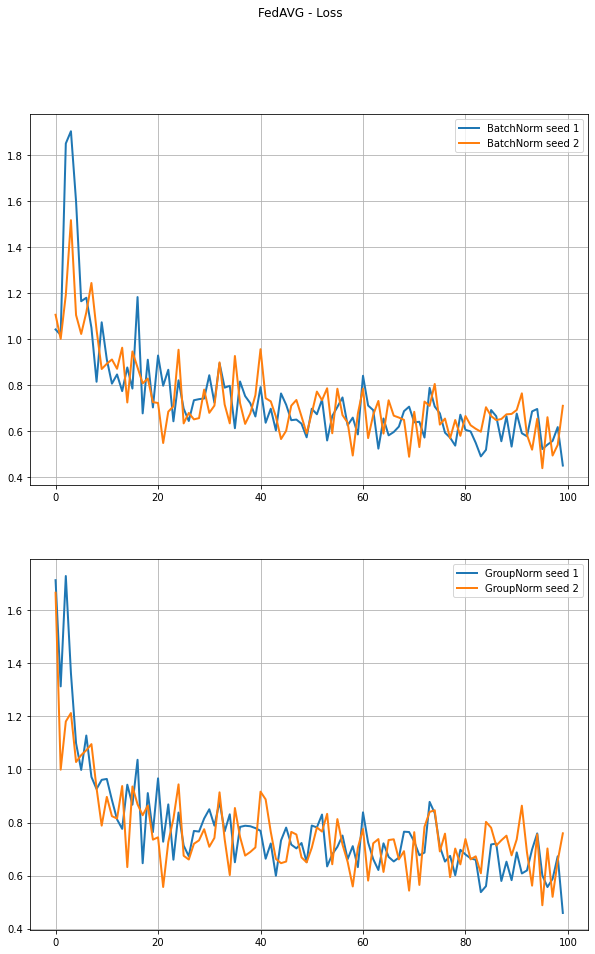

In [108]:
data_batchNorm_iid0_unbalanced0_s1 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[0]_E[1]_B[10]_BatchNorm_numGroups[0].csv")
data_groupNorm_iid0_unbalanced0_s1 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[0]_E[1]_B[10]_GroupNorm_numGroups[4].csv")
data_batchNorm_iid0_unbalanced0_s2 = pd.read_csv("fedAVG_results/new_random_seed/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[0]_E[1]_B[10]_BatchNorm_numGroups[0].csv")
data_groupNorm_iid0_unbalanced0_s2 = pd.read_csv("fedAVG_results/new_random_seed/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[0]_E[1]_B[10]_GroupNorm_numGroups[4].csv")

train_loss_batchNorm_iid0_unbalanced0_s1 = list(data_batchNorm_iid0_unbalanced0_s1["train_loss"].values)
train_acc_batchNorm_iid0_unbalanced0_s1 = list(data_batchNorm_iid0_unbalanced0_s1["train_accuracy"].values)
train_loss_groupNorm_iid0_unbalanced0_s1 = list(data_groupNorm_iid0_unbalanced0_s1["train_loss"].values)
train_acc_groupNorm_iid0_unbalanced0_s1 = list(data_groupNorm_iid0_unbalanced0_s1["train_accuracy"].values)
train_loss_batchNorm_iid0_unbalanced0_s2 = list(data_batchNorm_iid0_unbalanced0_s2["train_loss"].values)
train_acc_batchNorm_iid0_unbalanced0_s2 = list(data_batchNorm_iid0_unbalanced0_s2["train_accuracy"].values)
train_loss_groupNorm_iid0_unbalanced0_s2 = list(data_groupNorm_iid0_unbalanced0_s2["train_loss"].values)
train_acc_groupNorm_iid0_unbalanced0_s2 = list(data_groupNorm_iid0_unbalanced0_s2["train_accuracy"].values)

fig, ax = plt.subplots(2, figsize=(10, 15))

ax[0].plot(range(len(train_loss_batchNorm_iid0_unbalanced0_s1)), train_loss_batchNorm_iid0_unbalanced0_s1, linewidth=2, linestyle='-', label="BatchNorm seed 1")
ax[1].plot(range(len(train_loss_groupNorm_iid0_unbalanced0_s1)), train_loss_groupNorm_iid0_unbalanced0_s1, linewidth=2, linestyle='-', label="GroupNorm seed 1")
ax[0].plot(range(len(train_loss_batchNorm_iid0_unbalanced0_s2)), train_loss_batchNorm_iid0_unbalanced0_s2, linewidth=2, linestyle='-', label="BatchNorm seed 2")
ax[1].plot(range(len(train_loss_groupNorm_iid0_unbalanced0_s2)), train_loss_groupNorm_iid0_unbalanced0_s2, linewidth=2, linestyle='-', label="GroupNorm seed 2")

ax[0].legend()
ax[0].grid()
ax[1].legend()
ax[1].grid()

plt.suptitle('FedAVG - Loss')

plt.savefig("fedAVG_results/new_random_seed/seed_differences_loss.png")

plt.show()

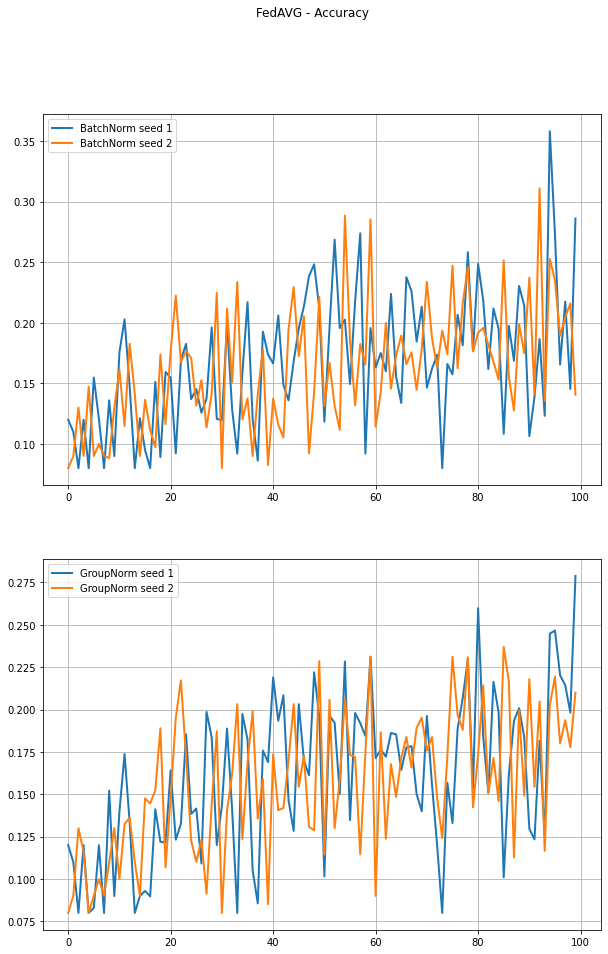

In [109]:
fig, ax = plt.subplots(2, figsize=(10, 15))

ax[0].plot(range(len(train_acc_batchNorm_iid0_unbalanced0_s1)), train_acc_batchNorm_iid0_unbalanced0_s1, linewidth=2, linestyle='-', label="BatchNorm seed 1")
ax[1].plot(range(len(train_acc_groupNorm_iid0_unbalanced0_s1)), train_acc_groupNorm_iid0_unbalanced0_s1, linewidth=2, linestyle='-', label="GroupNorm seed 1")
ax[0].plot(range(len(train_acc_batchNorm_iid0_unbalanced0_s2)), train_acc_batchNorm_iid0_unbalanced0_s2, linewidth=2, linestyle='-', label="BatchNorm seed 2")
ax[1].plot(range(len(train_acc_groupNorm_iid0_unbalanced0_s2)), train_acc_groupNorm_iid0_unbalanced0_s2, linewidth=2, linestyle='-', label="GroupNorm seed 2")

ax[0].legend()
ax[0].grid()
ax[1].legend()
ax[1].grid()

plt.suptitle('FedAVG - Accuracy')

plt.savefig("fedAVG_results/new_random_seed/seed_differences_accuracy.png")

plt.show()

In [110]:
# FedAVG
# data_batchNorm_iid1_unbalanced0 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[1]_unbalanced[0]_E[1]_B[10]_BatchNorm_numGroups[0].csv")
# data_batchNorm_iid0_unbalanced0 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[0]_E[1]_B[10]_BatchNorm_numGroups[0].csv")
# data_batchNorm_iid0_unbalanced1 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[1]_E[1]_B[10]_BatchNorm_numGroups[0].csv")
# data_groupNorm_iid1_unbalanced0 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[1]_unbalanced[0]_E[1]_B[10]_GroupNorm_numGroups[4].csv")
# data_groupNorm_iid0_unbalanced0 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[0]_E[1]_B[10]_GroupNorm_numGroups[4].csv")
# data_groupNorm_iid0_unbalanced1 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[1]_E[1]_B[10]_GroupNorm_numGroups[4].csv")
data_batchNorm_iid1_unbalanced0 = pd.read_csv("fedAVG_results/new_random_seed/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[1]_unbalanced[0]_E[1]_B[10]_BatchNorm_numGroups[0].csv")
data_batchNorm_iid0_unbalanced0 = pd.read_csv("fedAVG_results/new_random_seed/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[0]_E[1]_B[10]_BatchNorm_numGroups[0].csv")
data_batchNorm_iid0_unbalanced1 = pd.read_csv("fedAVG_results/new_random_seed/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[1]_E[1]_B[10]_BatchNorm_numGroups[0].csv")
data_groupNorm_iid1_unbalanced0 = pd.read_csv("fedAVG_results/new_random_seed/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[1]_unbalanced[0]_E[1]_B[10]_GroupNorm_numGroups[4].csv")
data_groupNorm_iid0_unbalanced0 = pd.read_csv("fedAVG_results/new_random_seed/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[0]_E[1]_B[10]_GroupNorm_numGroups[4].csv")
data_groupNorm_iid0_unbalanced1 = pd.read_csv("fedAVG_results/new_random_seed/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[1]_E[1]_B[10]_GroupNorm_numGroups[4].csv")

In [3]:
data_groupNorm_iid1_unbalanced0.head(10)

,Unnamed: 0,train_loss,train_accuracy
0,0,3.487628,0.1020
1,1,2.801506,0.1130
2,2,2.596063,0.1094
3,3,2.528836,0.1488
4,4,2.479602,0.1574
5,5,2.447496,0.1494
6,6,2.418099,0.1820
7,7,2.380921,0.1814
8,8,2.352809,0.1656
9,9,2.330857,0.1912


In [111]:
# BatchNorm
train_loss_batchNorm_iid1_unbalanced0 = list(data_batchNorm_iid1_unbalanced0["train_loss"].values)
train_acc_batchNorm_iid1_unbalanced0 = list(data_batchNorm_iid1_unbalanced0["train_accuracy"].values)

train_loss_batchNorm_iid0_unbalanced0 = list(data_batchNorm_iid0_unbalanced0["train_loss"].values)
train_acc_batchNorm_iid0_unbalanced0 = list(data_batchNorm_iid0_unbalanced0["train_accuracy"].values)

train_loss_batchNorm_iid0_unbalanced1 = list(data_batchNorm_iid0_unbalanced1["train_loss"].values)
train_acc_batchNorm_iid0_unbalanced1 = list(data_batchNorm_iid0_unbalanced1["train_accuracy"].values)

# GroupNorm
train_loss_groupNorm_iid1_unbalanced0 = list(data_groupNorm_iid1_unbalanced0["train_loss"].values)
train_acc_groupNorm_iid1_unbalanced0 = list(data_groupNorm_iid1_unbalanced0["train_accuracy"].values)

train_loss_groupNorm_iid0_unbalanced0 = list(data_groupNorm_iid0_unbalanced0["train_loss"].values)
train_acc_groupNorm_iid0_unbalanced0 = list(data_groupNorm_iid0_unbalanced0["train_accuracy"].values)

train_loss_groupNorm_iid0_unbalanced1 = list(data_groupNorm_iid0_unbalanced1["train_loss"].values)
train_acc_groupNorm_iid0_unbalanced1 = list(data_groupNorm_iid0_unbalanced1["train_accuracy"].values)

# train_loss_groupNorm = list(data_groupNorm["train_loss"].values)
# train_accuracy_groupNorm = list(data_groupNorm["train_accuracy"].values)
# train_loss_batchNorm = list(data_batchNorm["train_loss"].values)
# train_accuracy_batchNorm = list(data_batchNorm["train_accuracy"].values)

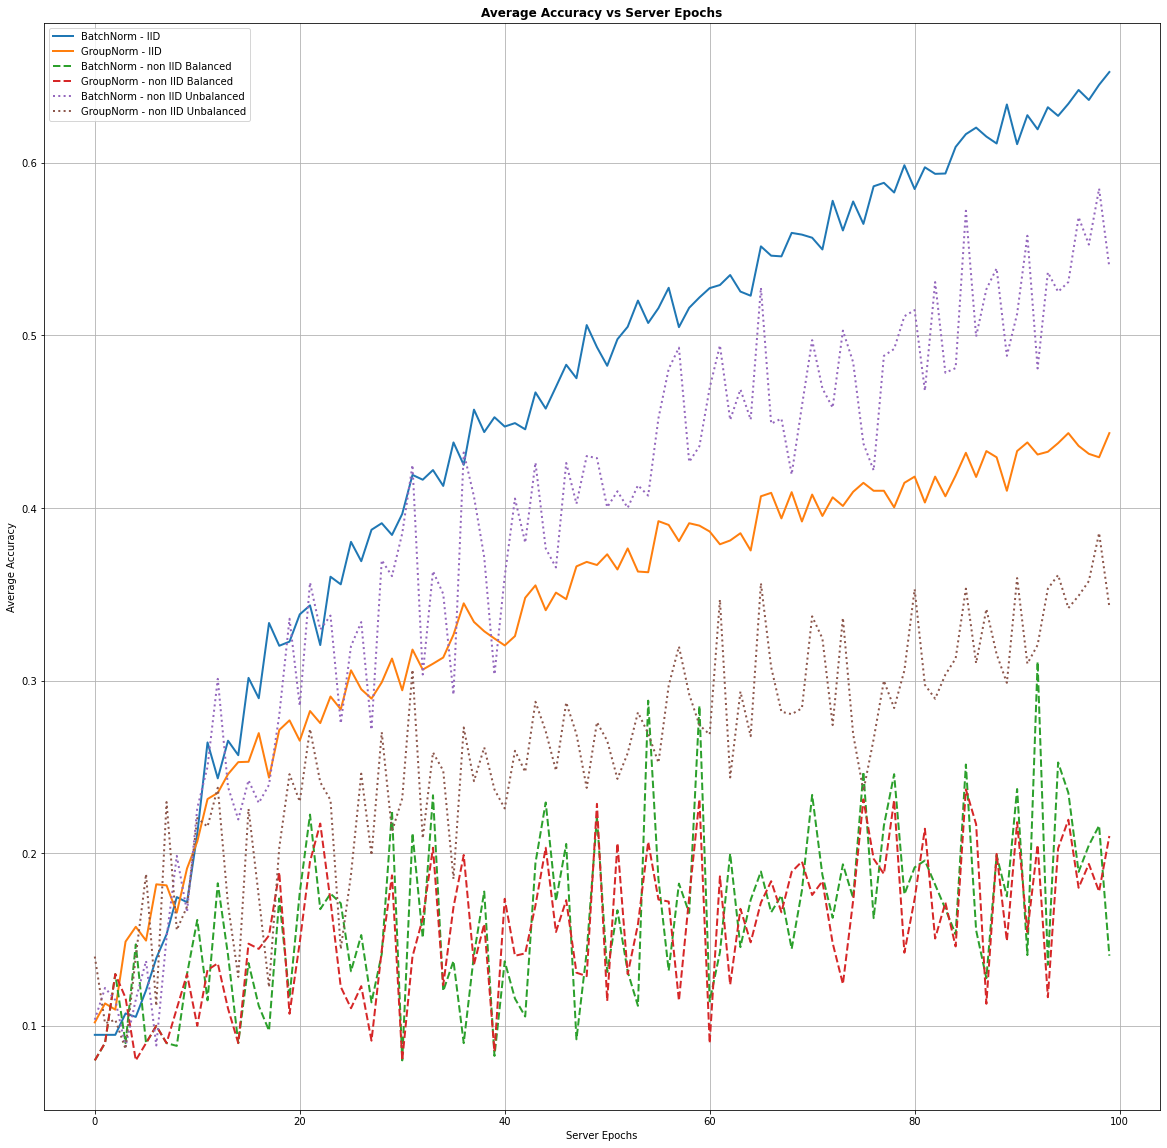

In [113]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.plot(range(len(train_acc_batchNorm_iid1_unbalanced0)), train_acc_batchNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm - IID")
ax.plot(range(len(train_acc_groupNorm_iid1_unbalanced0)), train_acc_groupNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm - IID")

ax.plot(range(len(train_acc_batchNorm_iid0_unbalanced0)), train_acc_batchNorm_iid0_unbalanced0, linewidth=2, linestyle='--', label="BatchNorm - non IID Balanced")
ax.plot(range(len(train_acc_groupNorm_iid0_unbalanced0)), train_acc_groupNorm_iid0_unbalanced0, linewidth=2, linestyle='--', label="GroupNorm - non IID Balanced")

ax.plot(range(len(train_acc_batchNorm_iid0_unbalanced1)), train_acc_batchNorm_iid0_unbalanced1, linewidth=2, linestyle=':', label="BatchNorm - non IID Unbalanced")
ax.plot(range(len(train_acc_groupNorm_iid0_unbalanced1)), train_acc_groupNorm_iid0_unbalanced1, linewidth=2, linestyle=':', label="GroupNorm - non IID Unbalanced")


plt.title("Average Accuracy vs Server Epochs", weight="bold")
plt.ylabel('Average Accuracy')
plt.xlabel('Server Epochs')

ax.legend()
ax.grid()

# file_name = '{}_{}_lr_[{}]_C[{}]_iid[{}]_E[{}]_B[{}]_loss.png'.format(
#     "ResNet50", n_epochs, lr, frac, iid,
#     local_epochs, local_batch_size)

# plt.savefig("fedAVG_results/fedAVG_summary_results_accuracy.png")
plt.savefig("fedAVG_results/new_random_seed/fedAVG_summary_results_accuracy.png")

plt.show()

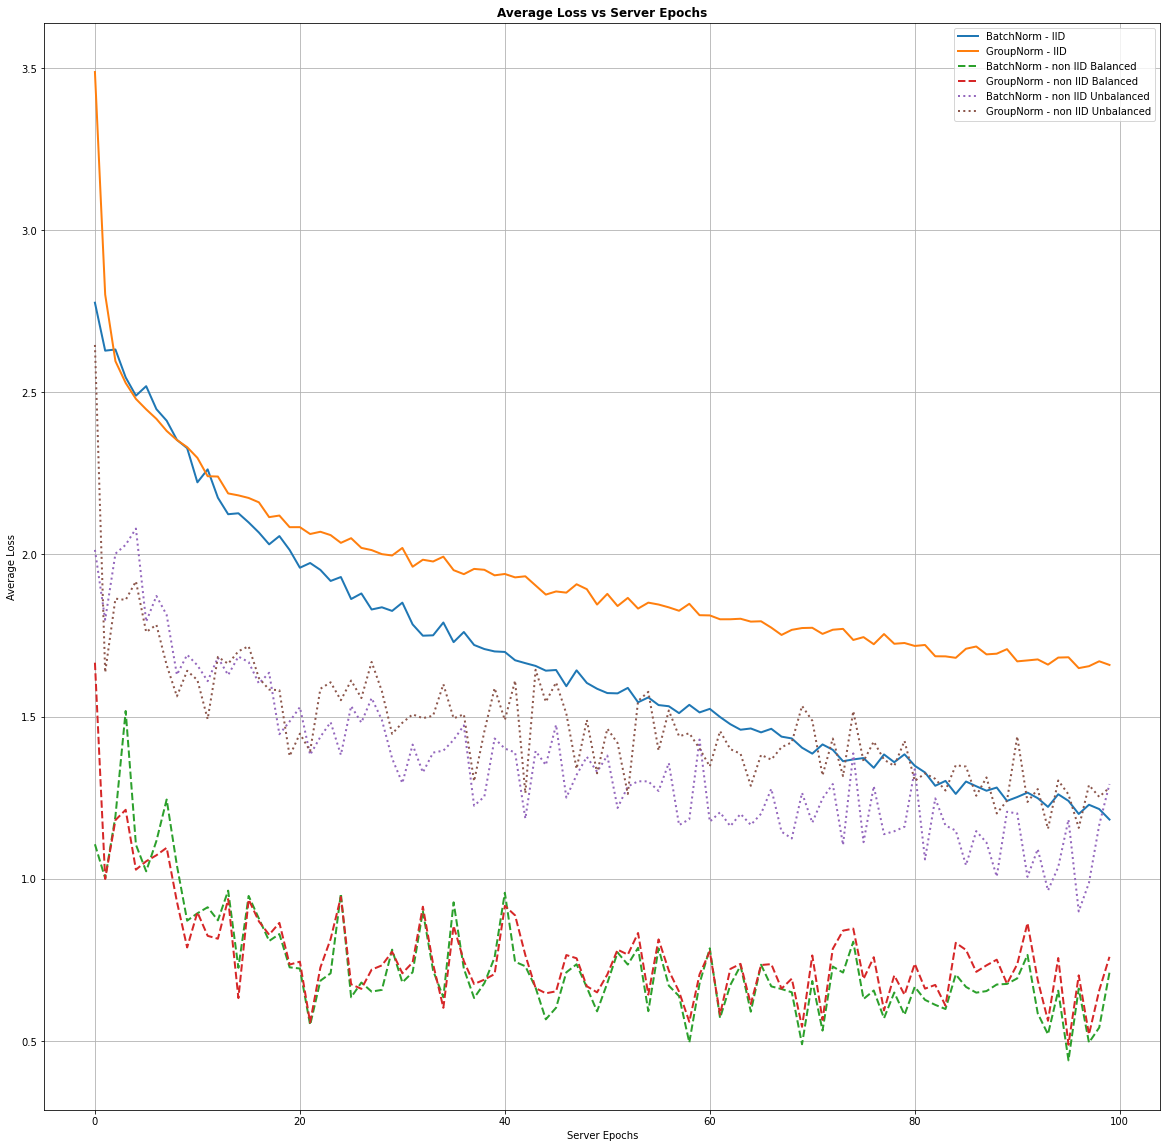

In [114]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.plot(range(len(train_loss_batchNorm_iid1_unbalanced0)), train_loss_batchNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm - IID")
ax.plot(range(len(train_loss_groupNorm_iid1_unbalanced0)), train_loss_groupNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm - IID")

ax.plot(range(len(train_loss_batchNorm_iid0_unbalanced0)), train_loss_batchNorm_iid0_unbalanced0, linewidth=2, linestyle='--', label="BatchNorm - non IID Balanced")
ax.plot(range(len(train_loss_groupNorm_iid0_unbalanced0)), train_loss_groupNorm_iid0_unbalanced0, linewidth=2, linestyle='--', label="GroupNorm - non IID Balanced")

ax.plot(range(len(train_loss_batchNorm_iid0_unbalanced1)), train_loss_batchNorm_iid0_unbalanced1, linewidth=2, linestyle=':', label="BatchNorm - non IID Unbalanced")
ax.plot(range(len(train_loss_groupNorm_iid0_unbalanced1)), train_loss_groupNorm_iid0_unbalanced1, linewidth=2, linestyle=':', label="GroupNorm - non IID Unbalanced")


plt.title("Average Loss vs Server Epochs", weight="bold")
plt.ylabel('Average Loss')
plt.xlabel('Server Epochs')

ax.legend()
ax.grid()

# plt.savefig("fedAVG_results/fedAVG_summary_results_loss.png")
plt.savefig("fedAVG_results/new_random_seed/fedAVG_summary_results_loss.png")

plt.show()

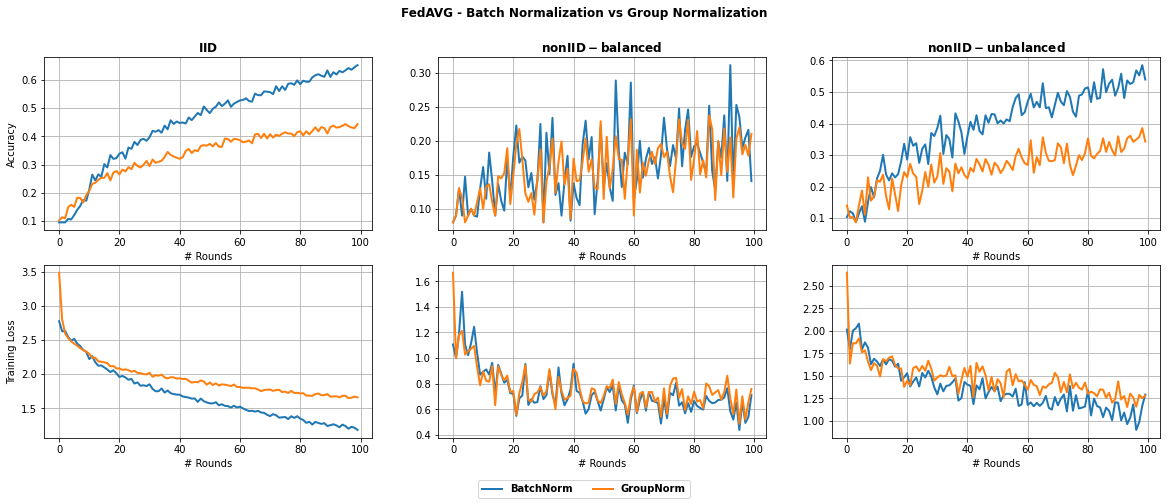

In [122]:
fig, ax = plt.subplots(2, 3, figsize=(20, 7))

ax[0][0].plot(range(len(train_acc_batchNorm_iid1_unbalanced0)), train_acc_batchNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm")
ax[0][0].plot(range(len(train_acc_groupNorm_iid1_unbalanced0)), train_acc_groupNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm")

ax[0][1].plot(range(len(train_acc_batchNorm_iid0_unbalanced0)), train_acc_batchNorm_iid0_unbalanced0, linewidth=2, linestyle='-')
ax[0][1].plot(range(len(train_acc_groupNorm_iid0_unbalanced0)), train_acc_groupNorm_iid0_unbalanced0, linewidth=2, linestyle='-')

ax[0][2].plot(range(len(train_acc_batchNorm_iid0_unbalanced1)), train_acc_batchNorm_iid0_unbalanced1, linewidth=2, linestyle='-')
ax[0][2].plot(range(len(train_acc_groupNorm_iid0_unbalanced1)), train_acc_groupNorm_iid0_unbalanced1, linewidth=2, linestyle='-')

ax[1][0].plot(range(len(train_loss_batchNorm_iid1_unbalanced0)), train_loss_batchNorm_iid1_unbalanced0, linewidth=2, linestyle='-')
ax[1][0].plot(range(len(train_loss_groupNorm_iid1_unbalanced0)), train_loss_groupNorm_iid1_unbalanced0, linewidth=2, linestyle='-')

ax[1][1].plot(range(len(train_loss_batchNorm_iid0_unbalanced0)), train_loss_batchNorm_iid0_unbalanced0, linewidth=2, linestyle='-')
ax[1][1].plot(range(len(train_loss_groupNorm_iid0_unbalanced0)), train_loss_groupNorm_iid0_unbalanced0, linewidth=2, linestyle='-')

ax[1][2].plot(range(len(train_loss_batchNorm_iid0_unbalanced1)), train_loss_batchNorm_iid0_unbalanced1, linewidth=2, linestyle='-')
ax[1][2].plot(range(len(train_loss_groupNorm_iid0_unbalanced1)), train_loss_groupNorm_iid0_unbalanced1, linewidth=2, linestyle='-')


ax[0][0].title.set_text(r"$\bf{" + "IID" + "}$")
ax[0][1].title.set_text(r"$\bf{" + "non IID - balanced" + "}$")
ax[0][2].title.set_text(r"$\bf{" + "non IID - unbalanced" + "}$")

ax[0][0].set_ylabel('Accuracy')
ax[1][0].set_ylabel('Training Loss')

plt.suptitle('FedAVG - Batch Normalization vs Group Normalization', weight="bold")

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower center', ncol=2, prop={'weight':'bold'})

ax[0][0].set_xlabel('# Rounds')
ax[0][1].set_xlabel('# Rounds')
ax[0][2].set_xlabel('# Rounds')
ax[1][0].set_xlabel('# Rounds')
ax[1][1].set_xlabel('# Rounds')
ax[1][2].set_xlabel('# Rounds')

ax[0][0].grid()
ax[0][1].grid()
ax[0][2].grid()
ax[1][0].grid()
ax[1][1].grid()
ax[1][2].grid()

# plt.savefig("fedAVG_results/fedAVG_summary_results.png")
plt.savefig("fedAVG_results/new_random_seed/fedAVG_summary_results.png")

plt.show()

In [3]:
# FedGKT
data_batchNorm_iid1_unbalanced0 = pd.read_csv("fedGKT_results/ResNet50_BatchNorm_10_lr_[0.001]_C[0.1]_iid[1]_Es[10]_Ec[1]_B[128]_sgd_unbalanced[0].csv")
data_batchNorm_iid0_unbalanced0 = pd.read_csv("fedGKT_results/ResNet50_BatchNorm_10_lr_[0.001]_C[0.1]_iid[0]_Es[10]_Ec[1]_B[128]_sgd_unbalanced[0].csv")
data_batchNorm_iid0_unbalanced1 = pd.read_csv("fedGKT_results/ResNet50_BatchNorm_10_lr_[0.001]_C[0.1]_iid[0]_Es[10]_Ec[1]_B[128]_sgd_unbalanced[1].csv")
data_groupNorm_iid1_unbalanced0 = pd.read_csv("fedGKT_results/ResNet50_GroupNorm_10_lr_[0.001]_C[0.1]_iid[1]_Es[10]_Ec[1]_B[128]_sgd_unbalanced[0].csv")
data_groupNorm_iid0_unbalanced0 = pd.read_csv("fedGKT_results/ResNet50_GroupNorm_10_lr_[0.001]_C[0.1]_iid[0]_Es[10]_Ec[1]_B[128]_sgd_unbalanced[0].csv")
data_groupNorm_iid0_unbalanced1 = pd.read_csv("fedGKT_results/ResNet50_GroupNorm_10_lr_[0.001]_C[0.1]_iid[0]_Es[10]_Ec[1]_B[128]_sgd_unbalanced[1].csv")

data_batchNorm_iid1_unbalanced0_s2 = pd.read_csv("fedGKT_results/new_random_seed/ResNet50_BatchNorm_10_lr_[0.001]_C[0.1]_iid[1]_Es[10]_Ec[1]_B[128]_sgd_unbalanced[0].csv")
data_batchNorm_iid0_unbalanced0_s2 = pd.read_csv("fedGKT_results/new_random_seed/ResNet50_BatchNorm_10_lr_[0.001]_C[0.1]_iid[0]_Es[10]_Ec[1]_B[128]_sgd_unbalanced[0].csv")
data_groupNorm_iid1_unbalanced0_s2 = pd.read_csv("fedGKT_results/new_random_seed/ResNet50_GroupNorm_10_lr_[0.001]_C[0.1]_iid[1]_Es[10]_Ec[1]_B[128]_sgd_unbalanced[0].csv")
data_groupNorm_iid0_unbalanced0_s2 = pd.read_csv("fedGKT_results/new_random_seed/ResNet50_GroupNorm_10_lr_[0.001]_C[0.1]_iid[0]_Es[10]_Ec[1]_B[128]_sgd_unbalanced[0].csv")

In [4]:
# BatchNorm
train_loss_batchNorm_iid1_unbalanced0 = list(data_batchNorm_iid1_unbalanced0["train_loss"].values)
train_acc_batchNorm_iid1_unbalanced0 = list(data_batchNorm_iid1_unbalanced0["train_accuracy"].values)

train_loss_batchNorm_iid0_unbalanced0 = list(data_batchNorm_iid0_unbalanced0["train_loss"].values)
train_acc_batchNorm_iid0_unbalanced0 = list(data_batchNorm_iid0_unbalanced0["train_accuracy"].values)

train_loss_batchNorm_iid0_unbalanced1 = list(data_batchNorm_iid0_unbalanced1["train_loss"].values)
train_acc_batchNorm_iid0_unbalanced1 = list(data_batchNorm_iid0_unbalanced1["train_accuracy"].values)

# GroupNorm
train_loss_groupNorm_iid1_unbalanced0 = list(data_groupNorm_iid1_unbalanced0["train_loss"].values)
train_acc_groupNorm_iid1_unbalanced0 = list(data_groupNorm_iid1_unbalanced0["train_accuracy"].values)

train_loss_groupNorm_iid0_unbalanced0 = list(data_groupNorm_iid0_unbalanced0["train_loss"].values)
train_acc_groupNorm_iid0_unbalanced0 = list(data_groupNorm_iid0_unbalanced0["train_accuracy"].values)

train_loss_groupNorm_iid0_unbalanced1 = list(data_groupNorm_iid0_unbalanced1["train_loss"].values)
train_acc_groupNorm_iid0_unbalanced1 = list(data_groupNorm_iid0_unbalanced1["train_accuracy"].values)



train_loss_batchNorm_iid1_unbalanced0_s2 = list(data_batchNorm_iid1_unbalanced0_s2["train_loss"].values)
train_acc_batchNorm_iid1_unbalanced0_s2 = list(data_batchNorm_iid1_unbalanced0_s2["train_accuracy"].values)
train_loss_batchNorm_iid0_unbalanced0_s2 = list(data_batchNorm_iid0_unbalanced0_s2["train_loss"].values)
train_acc_batchNorm_iid0_unbalanced0_s2 = list(data_batchNorm_iid0_unbalanced0_s2["train_accuracy"].values)
train_loss_groupNorm_iid1_unbalanced0_s2 = list(data_groupNorm_iid1_unbalanced0_s2["train_loss"].values)
train_acc_groupNorm_iid1_unbalanced0_s2 = list(data_groupNorm_iid1_unbalanced0_s2["train_accuracy"].values)
train_loss_groupNorm_iid0_unbalanced0_s2 = list(data_groupNorm_iid0_unbalanced0_s2["train_loss"].values)
train_acc_groupNorm_iid0_unbalanced0_s2 = list(data_groupNorm_iid0_unbalanced0_s2["train_accuracy"].values)

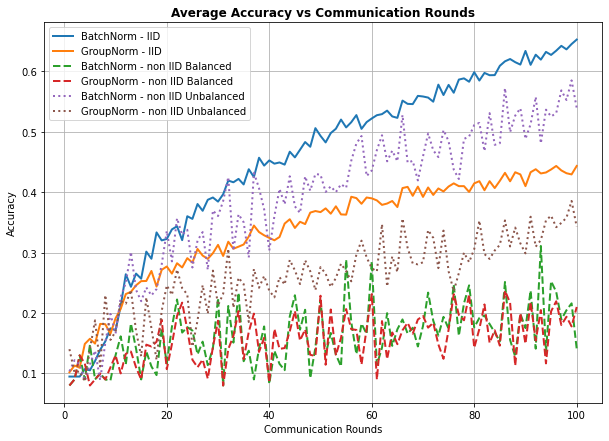

In [121]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(range(1, len(train_acc_batchNorm_iid1_unbalanced0)+1), train_acc_batchNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm - IID")
ax.plot(range(1, len(train_acc_groupNorm_iid1_unbalanced0)+1), train_acc_groupNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm - IID")

ax.plot(range(1, len(train_acc_batchNorm_iid0_unbalanced0)+1), train_acc_batchNorm_iid0_unbalanced0, linewidth=2, linestyle='--', label="BatchNorm - non IID Balanced")
ax.plot(range(1, len(train_acc_groupNorm_iid0_unbalanced0)+1), train_acc_groupNorm_iid0_unbalanced0, linewidth=2, linestyle='--', label="GroupNorm - non IID Balanced")

ax.plot(range(1, len(train_acc_batchNorm_iid0_unbalanced1)+1), train_acc_batchNorm_iid0_unbalanced1, linewidth=2, linestyle=':', label="BatchNorm - non IID Unbalanced")
ax.plot(range(1, len(train_acc_groupNorm_iid0_unbalanced1)+1), train_acc_groupNorm_iid0_unbalanced1, linewidth=2, linestyle=':', label="GroupNorm - non IID Unbalanced")


plt.title("Average Accuracy vs Communication Rounds", weight="bold")
plt.ylabel('Accuracy')
plt.xlabel('Communication Rounds')

ax.legend()
ax.grid()

# file_name = '{}_{}_lr_[{}]_C[{}]_iid[{}]_E[{}]_B[{}]_loss.png'.format(
#     "ResNet50", n_epochs, lr, frac, iid,
#     local_epochs, local_batch_size)
plt.savefig("fedGKT_results/fedGKT_summary_results_acc.png")

plt.show()

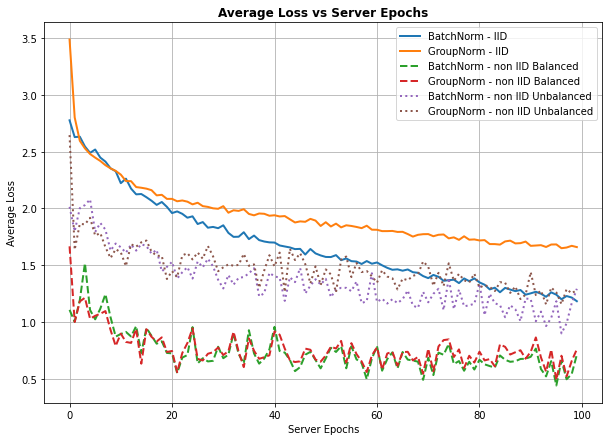

In [123]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(range(len(train_loss_batchNorm_iid1_unbalanced0)), train_loss_batchNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm - IID")
ax.plot(range(len(train_loss_groupNorm_iid1_unbalanced0)), train_loss_groupNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm - IID")

ax.plot(range(len(train_loss_batchNorm_iid0_unbalanced0)), train_loss_batchNorm_iid0_unbalanced0, linewidth=2, linestyle='--', label="BatchNorm - non IID Balanced")
ax.plot(range(len(train_loss_groupNorm_iid0_unbalanced0)), train_loss_groupNorm_iid0_unbalanced0, linewidth=2, linestyle='--', label="GroupNorm - non IID Balanced")

ax.plot(range(len(train_loss_batchNorm_iid0_unbalanced1)), train_loss_batchNorm_iid0_unbalanced1, linewidth=2, linestyle=':', label="BatchNorm - non IID Unbalanced")
ax.plot(range(len(train_loss_groupNorm_iid0_unbalanced1)), train_loss_groupNorm_iid0_unbalanced1, linewidth=2, linestyle=':', label="GroupNorm - non IID Unbalanced")


plt.title("Average Loss vs Server Epochs", weight="bold")
plt.ylabel('Average Loss')
plt.xlabel('Server Epochs')

ax.legend()
ax.grid()

plt.savefig("fedGKT_results/fedGKT_summary_results_loss.png")

plt.show()

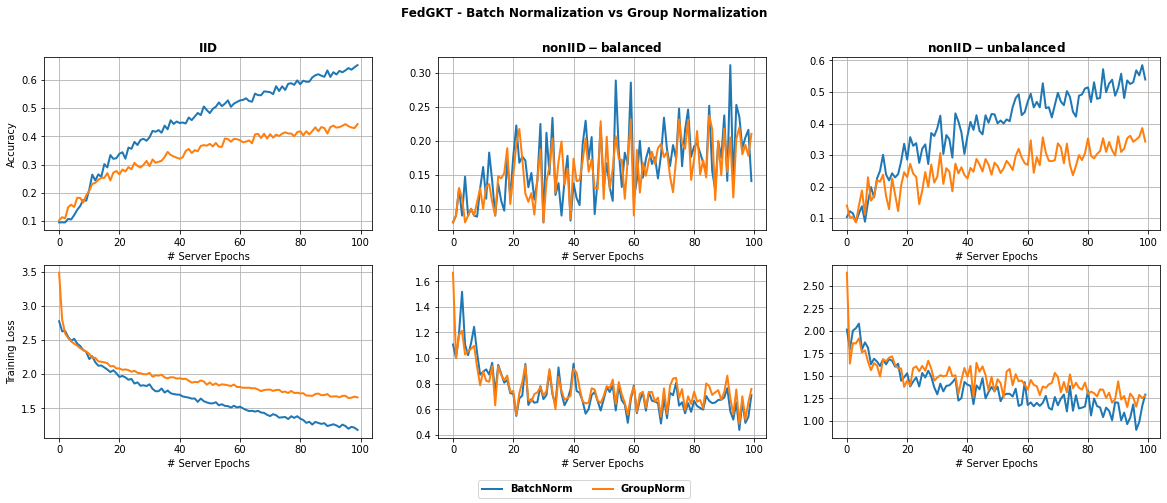

In [127]:
fig, ax = plt.subplots(2, 3, figsize=(20, 7))

ax[0][0].plot(range(len(train_acc_batchNorm_iid1_unbalanced0)), train_acc_batchNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm")
ax[0][0].plot(range(len(train_acc_groupNorm_iid1_unbalanced0)), train_acc_groupNorm_iid1_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm")
# ax[0][0].plot(range(len(train_acc_batchNorm_iid1_unbalanced0_s2)), train_acc_batchNorm_iid1_unbalanced0_s2, linewidth=2, linestyle='--', label="BatchNorm - new seed")
# ax[0][0].plot(range(len(train_acc_groupNorm_iid1_unbalanced0_s2)), train_acc_groupNorm_iid1_unbalanced0_s2, linewidth=2, linestyle='--', label="GroupNorm - new seed")

ax[0][1].plot(range(len(train_acc_batchNorm_iid0_unbalanced0)), train_acc_batchNorm_iid0_unbalanced0, linewidth=2, linestyle='-')
ax[0][1].plot(range(len(train_acc_groupNorm_iid0_unbalanced0)), train_acc_groupNorm_iid0_unbalanced0, linewidth=2, linestyle='-')
# ax[0][1].plot(range(len(train_acc_batchNorm_iid0_unbalanced0_s2)), train_acc_batchNorm_iid0_unbalanced0_s2, linewidth=2, linestyle='--')
# ax[0][1].plot(range(len(train_acc_groupNorm_iid0_unbalanced0_s2)), train_acc_groupNorm_iid0_unbalanced0_s2, linewidth=2, linestyle='--')

ax[0][2].plot(range(len(train_acc_batchNorm_iid0_unbalanced1)), train_acc_batchNorm_iid0_unbalanced1, linewidth=2, linestyle='-')
ax[0][2].plot(range(len(train_acc_groupNorm_iid0_unbalanced1)), train_acc_groupNorm_iid0_unbalanced1, linewidth=2, linestyle='-')

ax[1][0].plot(range(len(train_loss_batchNorm_iid1_unbalanced0)), train_loss_batchNorm_iid1_unbalanced0, linewidth=2, linestyle='-')
ax[1][0].plot(range(len(train_loss_groupNorm_iid1_unbalanced0)), train_loss_groupNorm_iid1_unbalanced0, linewidth=2, linestyle='-')
# ax[1][0].plot(range(len(train_loss_batchNorm_iid1_unbalanced0_s2)), train_loss_batchNorm_iid1_unbalanced0_s2, linewidth=2, linestyle='--')
# ax[1][0].plot(range(len(train_loss_groupNorm_iid1_unbalanced0_s2)), train_loss_groupNorm_iid1_unbalanced0_s2, linewidth=2, linestyle='--')

ax[1][1].plot(range(len(train_loss_batchNorm_iid0_unbalanced0)), train_loss_batchNorm_iid0_unbalanced0, linewidth=2, linestyle='-')
ax[1][1].plot(range(len(train_loss_groupNorm_iid0_unbalanced0)), train_loss_groupNorm_iid0_unbalanced0, linewidth=2, linestyle='-')
# ax[1][1].plot(range(len(train_loss_batchNorm_iid0_unbalanced0_s2)), train_loss_batchNorm_iid0_unbalanced0_s2, linewidth=2, linestyle='--')
# ax[1][1].plot(range(len(train_loss_groupNorm_iid0_unbalanced0_s2)), train_loss_groupNorm_iid0_unbalanced0_s2, linewidth=2, linestyle='--')

ax[1][2].plot(range(len(train_loss_batchNorm_iid0_unbalanced1)), train_loss_batchNorm_iid0_unbalanced1, linewidth=2, linestyle='-')
ax[1][2].plot(range(len(train_loss_groupNorm_iid0_unbalanced1)), train_loss_groupNorm_iid0_unbalanced1, linewidth=2, linestyle='-')


# ax[0][0].title.set_text("Average Accuracy vs Server Epochs - IID")
# ax[0][1].title.set_text("Average Accuracy vs Server Epochs - non IID balanced")
# ax[0][2].title.set_text("Average Accuracy vs Server Epochs - non IID unbalanced")
# ax[1][0].title.set_text("Average Loss vs Server Epochs - IID")
# ax[1][1].title.set_text("Average Loss vs Server Epochs - non IID balanced")
# ax[1][2].title.set_text("Average Loss vs Server Epochs - non IID unbalanced")

plt.suptitle('FedGKT - Batch Normalization vs Group Normalization', weight="bold")

# ax[0][0].legend()
# ax[0][0].grid()
# ax[0][1].legend()
# ax[0][1].grid()
# ax[0][2].legend()
# ax[0][2].grid()
# ax[1][0].legend()
# ax[1][0].grid()
# ax[1][1].legend()
# ax[1][1].grid()
# ax[1][2].legend()
# ax[1][2].grid()

ax[0][0].title.set_text(r"$\bf{" + "IID" + "}$")
ax[0][1].title.set_text(r"$\bf{" + "non IID - balanced" + "}$")
ax[0][2].title.set_text(r"$\bf{" + "non IID - unbalanced" + "}$")

ax[0][0].set_ylabel('Accuracy')
ax[1][0].set_ylabel('Training Loss')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower center', ncol=2, prop={'weight':'bold'})

ax[0][0].set_xlabel('# Server Epochs')
ax[0][1].set_xlabel('# Server Epochs')
ax[0][2].set_xlabel('# Server Epochs')
ax[1][0].set_xlabel('# Server Epochs')
ax[1][1].set_xlabel('# Server Epochs')
ax[1][2].set_xlabel('# Server Epochs')

ax[0][0].grid()
ax[0][1].grid()
ax[0][2].grid()
ax[1][0].grid()
ax[1][1].grid()
ax[1][2].grid()

plt.savefig("fedGKT_results/fedGKT_summary_results.png")

plt.show()

In [135]:
# centralized baseline
data_batchNorm = pd.read_csv("centralized_baseline_results/loss_SGD_batchNorm_acc92.csv", names=["epochs", "train_loss", "valid_loss", "train_acc", "valid_acc"])
data_groupNorm = pd.read_csv("centralized_baseline_results/loss_SGD_groupNorm_4_acc87.csv", names=["epochs", "train_loss", "valid_loss", "train_acc", "valid_acc"])

In [136]:
train_loss_batchNorm = list(data_batchNorm["valid_loss"].values)
train_acc_batchNorm = list(data_batchNorm["valid_acc"].values)
train_loss_groupNorm = list(data_groupNorm["valid_loss"].values)
train_acc_groupNorm = list(data_groupNorm["valid_acc"].values)

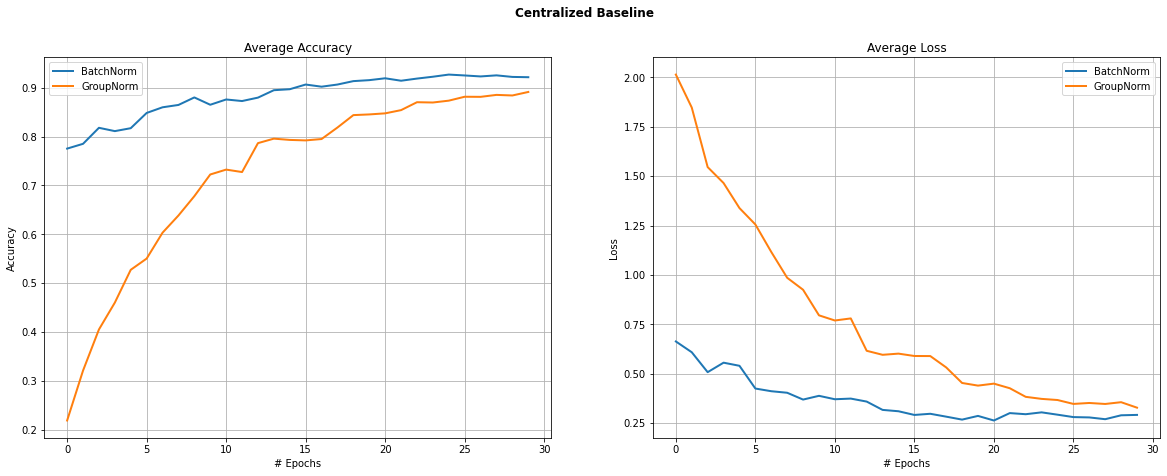

In [137]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].plot(range(len(train_acc_batchNorm)), train_acc_batchNorm, linewidth=2, linestyle='-', label="BatchNorm")
ax[0].plot(range(len(train_acc_groupNorm)), train_acc_groupNorm, linewidth=2, linestyle='-', label="GroupNorm")

ax[1].plot(range(len(train_loss_batchNorm)), train_loss_batchNorm, linewidth=2, linestyle='-', label="BatchNorm")
ax[1].plot(range(len(train_loss_groupNorm)), train_loss_groupNorm, linewidth=2, linestyle='-', label="GroupNorm")

ax[0].title.set_text("Average Accuracy")
ax[1].title.set_text("Average Loss")
# plt.ylabel('Average Accuracy')
# plt.xlabel('Server Epochs')

plt.suptitle('Centralized Baseline', weight="bold")

ax[0].set(xlabel="# Epochs", ylabel="Accuracy")
ax[1].set(xlabel="# Epochs", ylabel="Loss")

ax[0].legend()
ax[0].grid()
ax[1].legend()
ax[1].grid()

# file_name = '{}_{}_lr_[{}]_C[{}]_iid[{}]_E[{}]_B[{}]_loss.png'.format(
#     "ResNet50", n_epochs, lr, frac, iid,
#     local_epochs, local_batch_size)
plt.savefig("centralized_baseline_results/summary_results.png")

plt.show()

In [138]:
# FedAVG 500 epochs
data_batchNorm = pd.read_csv("fedAVG_results/ResNet50_BatchNorm_500_lr_[0.001]_C[0.1]_iid[1]_E[1]_B[10]_sgd_CrossEntropyLoss.csv")
data_groupNorm = pd.read_csv("fedAVG_results/ResNet50_GroupNorm_500_lr_[0.001]_C[0.1]_iid[1]_E[1]_B[10]_sgd_CrossEntropyLoss.csv")
train_loss_batchNorm = list(data_batchNorm["train_loss"].values)
train_acc_batchNorm = list(data_batchNorm["train_accuracy"].values)
train_loss_groupNorm = list(data_groupNorm["train_loss"].values)
train_acc_groupNorm = list(data_groupNorm["train_accuracy"].values)

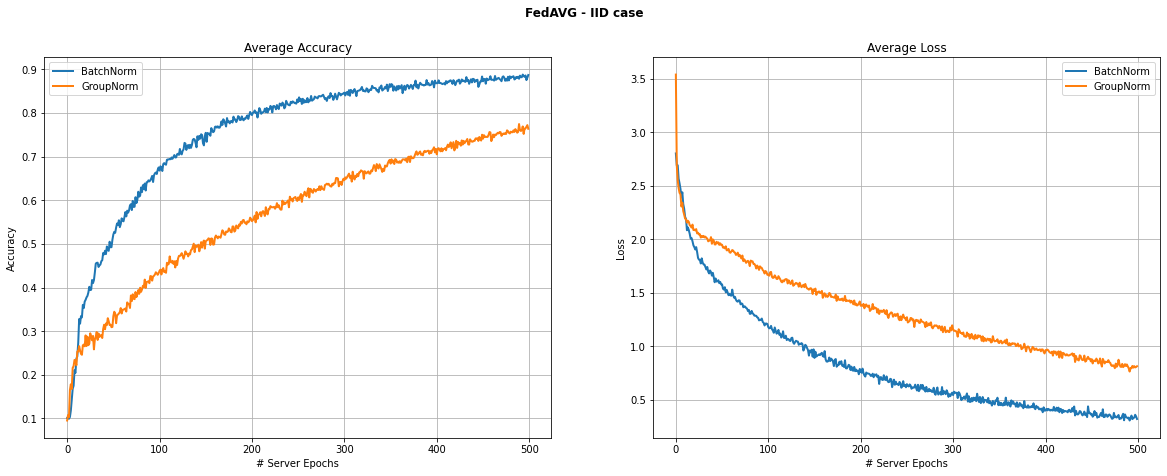

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].plot(range(len(train_acc_batchNorm)), train_acc_batchNorm, linewidth=2, linestyle='-', label="BatchNorm")
ax[0].plot(range(len(train_acc_groupNorm)), train_acc_groupNorm, linewidth=2, linestyle='-', label="GroupNorm")

ax[1].plot(range(len(train_loss_batchNorm)), train_loss_batchNorm, linewidth=2, linestyle='-', label="BatchNorm")
ax[1].plot(range(len(train_loss_groupNorm)), train_loss_groupNorm, linewidth=2, linestyle='-', label="GroupNorm")

ax[0].title.set_text("Average Accuracy")
ax[1].title.set_text("Average Loss")
# plt.ylabel('Average Accuracy')
# plt.xlabel('Server Epochs')

plt.suptitle('FedAVG - IID case', weight="bold")

ax[0].set(xlabel="# Server Epochs", ylabel="Accuracy")
ax[1].set(xlabel="# Server Epochs", ylabel="Loss")

ax[0].legend()
ax[0].grid()
ax[1].legend()
ax[1].grid()

# file_name = '{}_{}_lr_[{}]_C[{}]_iid[{}]_E[{}]_B[{}]_loss.png'.format(
#     "ResNet50", n_epochs, lr, frac, iid,
#     local_epochs, local_batch_size)
plt.savefig("fedAVG_results/iid_500epochs.png")

plt.show()

In [6]:
# FedProx

fedAvg_0_iid1_unbalance0 = pd.read_csv("fedAVG_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[1]_unbalanced[0]_E[10]_B[10]_BatchNorm_numGroups[0]_percentage[0].csv")
fedAvg_50_iid1_unbalance0 = pd.read_csv("fedAVG_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[1]_unbalanced[0]_E[10]_B[10]_BatchNorm_numGroups[0]_percentage[50].csv")
fedAvg_90_iid1_unbalance0 = pd.read_csv("fedAVG_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[1]_unbalanced[0]_E[10]_B[10]_BatchNorm_numGroups[0]_percentage[90].csv")

fedAvg_0_iid0_unbalance0 = pd.read_csv("fedAVG_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[0]_unbalanced[0]_E[10]_B[10]_BatchNorm_numGroups[0]_percentage[0].csv")
fedAvg_50_iid0_unbalance0 = pd.read_csv("fedAVG_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[0]_unbalanced[0]_E[10]_B[10]_BatchNorm_numGroups[0]_percentage[50].csv")
fedAvg_90_iid0_unbalance0 = pd.read_csv("fedAVG_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[0]_unbalanced[0]_E[10]_B[10]_BatchNorm_numGroups[0]_percentage[90].csv")

fedAvg_0_iid0_unbalance1 = pd.read_csv("fedAVG_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[0]_unbalanced[1]_E[10]_B[10]_BatchNorm_numGroups[0]_percentage[0].csv")
fedAvg_50_iid0_unbalance1 = pd.read_csv("fedAVG_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[0]_unbalanced[1]_E[10]_B[10]_BatchNorm_numGroups[0]_percentage[50].csv")
fedAvg_90_iid0_unbalance1 = pd.read_csv("fedAVG_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[0]_unbalanced[1]_E[10]_B[10]_BatchNorm_numGroups[0]_percentage[90].csv")


fedProx0_50_iid1_unbalance0 = pd.read_csv("FedProx_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[1]_unbalanced[0]_E[10]_B[10]_BatchNorm_numGroups[0]_mu[0]_percentage[50].csv")
fedProx0_90_iid1_unbalance0 = pd.read_csv("FedProx_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[1]_unbalanced[0]_E[10]_B[10]_BatchNorm_numGroups[0]_mu[0]_percentage[90].csv")

fedProx0_50_iid0_unbalance0 = pd.read_csv("FedProx_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[0]_unbalanced[0]_E[10]_B[10]_BatchNorm_numGroups[0]_mu[0]_percentage[50].csv")
fedProx0_90_iid0_unbalance0 = pd.read_csv("FedProx_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[0]_unbalanced[0]_E[10]_B[10]_BatchNorm_numGroups[0]_mu[0]_percentage[90].csv")

fedProx0_50_iid0_unbalance1 = pd.read_csv("FedProx_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[0]_unbalanced[1]_E[10]_B[10]_BatchNorm_numGroups[0]_mu[0]_percentage[50].csv")
fedProx0_90_iid0_unbalance1 = pd.read_csv("FedProx_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[0]_unbalanced[1]_E[10]_B[10]_BatchNorm_numGroups[0]_mu[0]_percentage[90].csv")


fedProx_0_iid1_unbalance0 = pd.read_csv("FedProx_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[1]_unbalanced[0]_E[10]_B[10]_BatchNorm_numGroups[0]_mu[0.01]_percentage[0].csv")
fedProx_50_iid1_unbalance0 = pd.read_csv("FedProx_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[1]_unbalanced[0]_E[10]_B[10]_BatchNorm_numGroups[0]_mu[0.01]_percentage[50].csv")
fedProx_90_iid1_unbalance0 = pd.read_csv("FedProx_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[1]_unbalanced[0]_E[10]_B[10]_BatchNorm_numGroups[0]_mu[0.01]_percentage[90].csv")

fedProx_0_iid0_unbalance0 = pd.read_csv("FedProx_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[0]_unbalanced[0]_E[10]_B[10]_BatchNorm_numGroups[0]_mu[0.01]_percentage[0].csv")
fedProx_50_iid0_unbalance0 = pd.read_csv("FedProx_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[0]_unbalanced[0]_E[10]_B[10]_BatchNorm_numGroups[0]_mu[0.01]_percentage[50].csv")
fedProx_90_iid0_unbalance0 = pd.read_csv("FedProx_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[0]_unbalanced[0]_E[10]_B[10]_BatchNorm_numGroups[0]_mu[0.01]_percentage[90].csv")

fedProx_0_iid0_unbalance1 = pd.read_csv("FedProx_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[0]_unbalanced[1]_E[10]_B[10]_BatchNorm_numGroups[0]_mu[0.01]_percentage[0].csv")
fedProx_50_iid0_unbalance1 = pd.read_csv("FedProx_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[0]_unbalanced[1]_E[10]_B[10]_BatchNorm_numGroups[0]_mu[0.01]_percentage[50].csv")
fedProx_90_iid0_unbalance1 = pd.read_csv("FedProx_results/ResNet50_30_sgd_lr_[0.01]_C[0.1]_iid[0]_unbalanced[1]_E[10]_B[10]_BatchNorm_numGroups[0]_mu[0.01]_percentage[90].csv")

In [7]:
fedAvg_0_iid1_unbalance0_acc, fedAvg_0_iid1_unbalance0_loss = list(fedAvg_0_iid1_unbalance0["train_accuracy"].values), list(fedAvg_0_iid1_unbalance0["train_loss"].values)
fedAvg_50_iid1_unbalance0_acc, fedAvg_50_iid1_unbalance0_loss = list(fedAvg_50_iid1_unbalance0["train_accuracy"].values), list(fedAvg_50_iid1_unbalance0["train_loss"].values)
fedAvg_90_iid1_unbalance0_acc, fedAvg_90_iid1_unbalance0_loss = list(fedAvg_90_iid1_unbalance0["train_accuracy"].values), list(fedAvg_90_iid1_unbalance0["train_loss"].values)

fedAvg_0_iid0_unbalance0_acc, fedAvg_0_iid0_unbalance0_loss = list(fedAvg_0_iid0_unbalance0["train_accuracy"].values), list(fedAvg_0_iid0_unbalance0["train_loss"].values)
fedAvg_50_iid0_unbalance0_acc, fedAvg_50_iid0_unbalance0_loss = list(fedAvg_50_iid0_unbalance0["train_accuracy"].values), list(fedAvg_50_iid0_unbalance0["train_loss"].values)
fedAvg_90_iid0_unbalance0_acc, fedAvg_90_iid0_unbalance0_loss = list(fedAvg_90_iid0_unbalance0["train_accuracy"].values), list(fedAvg_90_iid0_unbalance0["train_loss"].values)

fedAvg_0_iid0_unbalance1_acc, fedAvg_0_iid0_unbalance1_loss = list(fedAvg_0_iid0_unbalance1["train_accuracy"].values), list(fedAvg_0_iid0_unbalance1["train_loss"].values)
fedAvg_50_iid0_unbalance1_acc, fedAvg_50_iid0_unbalance1_loss = list(fedAvg_50_iid0_unbalance1["train_accuracy"].values), list(fedAvg_50_iid0_unbalance1["train_loss"].values)
fedAvg_90_iid0_unbalance1_acc, fedAvg_90_iid0_unbalance1_loss = list(fedAvg_90_iid0_unbalance1["train_accuracy"].values), list(fedAvg_90_iid0_unbalance1["train_loss"].values)


fedProx0_50_iid1_unbalance0_acc, fedProx0_50_iid1_unbalance0_loss = list(fedProx0_50_iid1_unbalance0["train_accuracy"].values), list(fedProx0_50_iid1_unbalance0["train_loss"].values)
fedProx0_90_iid1_unbalance0_acc, fedProx0_90_iid1_unbalance0_loss = list(fedProx0_90_iid1_unbalance0["train_accuracy"].values), list(fedProx0_90_iid1_unbalance0["train_loss"].values)

fedProx0_50_iid0_unbalance0_acc, fedProx0_50_iid0_unbalance0_loss = list(fedProx0_50_iid0_unbalance0["train_accuracy"].values), list(fedProx0_50_iid0_unbalance0["train_loss"].values)
fedProx0_90_iid0_unbalance0_acc, fedProx0_90_iid0_unbalance0_loss = list(fedProx0_90_iid0_unbalance0["train_accuracy"].values), list(fedProx0_90_iid0_unbalance0["train_loss"].values)

fedProx0_50_iid0_unbalance1_acc, fedProx0_50_iid0_unbalance1_loss = list(fedProx0_50_iid0_unbalance1["train_accuracy"].values), list(fedProx0_50_iid0_unbalance1["train_loss"].values)
fedProx0_90_iid0_unbalance1_acc, fedProx0_90_iid0_unbalance1_loss = list(fedProx0_90_iid0_unbalance1["train_accuracy"].values), list(fedProx0_90_iid0_unbalance1["train_loss"].values)


fedProx_0_iid1_unbalance0_acc, fedProx_0_iid1_unbalance0_loss = list(fedProx_0_iid1_unbalance0["train_accuracy"].values), list(fedProx_0_iid1_unbalance0["train_loss"].values)
fedProx_50_iid1_unbalance0_acc, fedProx_50_iid1_unbalance0_loss = list(fedProx_50_iid1_unbalance0["train_accuracy"].values), list(fedProx_50_iid1_unbalance0["train_loss"].values)
fedProx_90_iid1_unbalance0_acc, fedProx_90_iid1_unbalance0_loss = list(fedProx_90_iid1_unbalance0["train_accuracy"].values), list(fedProx_90_iid1_unbalance0["train_loss"].values)

fedProx_0_iid0_unbalance0_acc, fedProx_0_iid0_unbalance0_loss = list(fedProx_0_iid0_unbalance0["train_accuracy"].values), list(fedProx_0_iid0_unbalance0["train_loss"].values)
fedProx_50_iid0_unbalance0_acc, fedProx_50_iid0_unbalance0_loss = list(fedProx_50_iid0_unbalance0["train_accuracy"].values), list(fedProx_50_iid0_unbalance0["train_loss"].values)
fedProx_90_iid0_unbalance0_acc, fedProx_90_iid0_unbalance0_loss = list(fedProx_90_iid0_unbalance0["train_accuracy"].values), list(fedProx_90_iid0_unbalance0["train_loss"].values)

fedProx_0_iid0_unbalance1_acc, fedProx_0_iid0_unbalance1_loss = list(fedProx_0_iid0_unbalance1["train_accuracy"].values), list(fedProx_0_iid0_unbalance1["train_loss"].values)
fedProx_50_iid0_unbalance1_acc, fedProx_50_iid0_unbalance1_loss = list(fedProx_50_iid0_unbalance1["train_accuracy"].values), list(fedProx_50_iid0_unbalance1["train_loss"].values)
fedProx_90_iid0_unbalance1_acc, fedProx_90_iid0_unbalance1_loss = list(fedProx_90_iid0_unbalance1["train_accuracy"].values), list(fedProx_90_iid0_unbalance1["train_loss"].values)

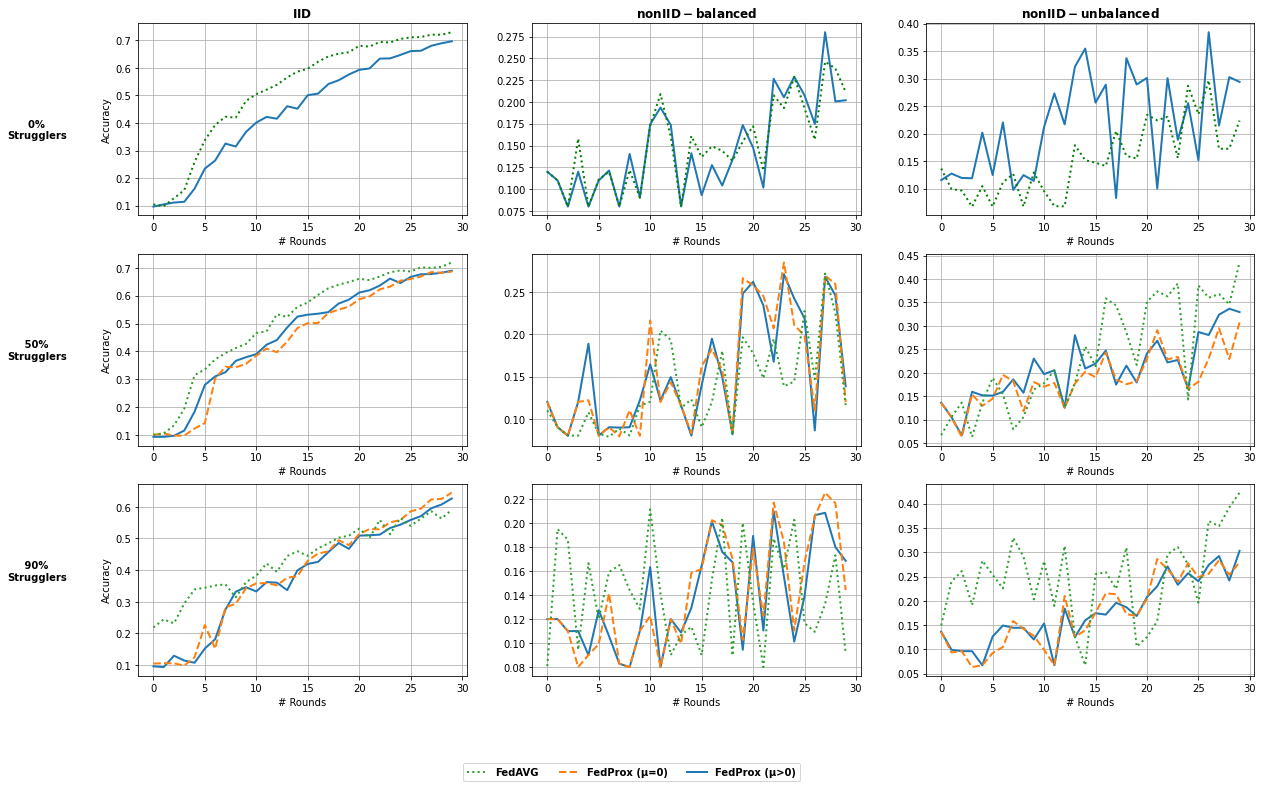

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(20, 12))

# 0% strugglers
ax[0][0].plot(range(len(fedProx_0_iid1_unbalance0_acc)), fedProx_0_iid1_unbalance0_acc, linewidth=2, linestyle='-')
# ax[0][0].plot(range(len()), , linewidth=2, linestyle='--')
ax[0][0].plot(range(len(fedAvg_0_iid1_unbalance0_acc)), fedAvg_0_iid1_unbalance0_acc, linewidth=2, linestyle=':', c='g')

ax[0][1].plot(range(len(fedProx_0_iid0_unbalance0_acc)), fedProx_0_iid0_unbalance0_acc, linewidth=2, linestyle='-')
# ax[0][1].plot(range(len()), , linewidth=2, linestyle='--')
ax[0][1].plot(range(len(fedAvg_0_iid0_unbalance0_acc)), fedAvg_0_iid0_unbalance0_acc, linewidth=2, linestyle=':', c='g')

ax[0][2].plot(range(len(fedProx_0_iid0_unbalance1_acc)), fedProx_0_iid0_unbalance1_acc, linewidth=2, linestyle='-')
# ax[0][2].plot(range(len()), , linewidth=2, linestyle='--')
ax[0][2].plot(range(len(fedAvg_0_iid0_unbalance1_acc)), fedAvg_0_iid0_unbalance1_acc, linewidth=2, linestyle=':', c='g')

# 50% strugglers
ax[1][0].plot(range(len(fedProx_50_iid1_unbalance0_acc)), fedProx_50_iid1_unbalance0_acc, linewidth=2, linestyle='-', label="FedProx (µ>0)")
ax[1][0].plot(range(len(fedProx0_50_iid1_unbalance0_acc)), fedProx0_50_iid1_unbalance0_acc, linewidth=2, linestyle='--', label="FedProx (µ=0)")
ax[1][0].plot(range(len(fedAvg_50_iid1_unbalance0_acc)), fedAvg_50_iid1_unbalance0_acc, linewidth=2, linestyle=':', label="FedAVG")

ax[1][1].plot(range(len(fedProx_50_iid0_unbalance0_acc)), fedProx_50_iid0_unbalance0_acc, linewidth=2, linestyle='-')
ax[1][1].plot(range(len(fedProx0_50_iid0_unbalance0_acc)), fedProx0_50_iid0_unbalance0_acc, linewidth=2, linestyle='--')
ax[1][1].plot(range(len(fedAvg_50_iid0_unbalance0_acc)), fedAvg_50_iid0_unbalance0_acc, linewidth=2, linestyle=':')

ax[1][2].plot(range(len(fedProx_50_iid0_unbalance1_acc)), fedProx_50_iid0_unbalance1_acc, linewidth=2, linestyle='-')
ax[1][2].plot(range(len(fedProx0_50_iid0_unbalance1_acc)), fedProx0_50_iid0_unbalance1_acc, linewidth=2, linestyle='--')
ax[1][2].plot(range(len(fedAvg_50_iid0_unbalance1_acc)), fedAvg_50_iid0_unbalance1_acc, linewidth=2, linestyle=':')

# 90% strugglers
ax[2][0].plot(range(len(fedProx_90_iid1_unbalance0_acc)), fedProx_90_iid1_unbalance0_acc, linewidth=2, linestyle='-')
ax[2][0].plot(range(len(fedProx0_90_iid1_unbalance0_acc)), fedProx0_90_iid1_unbalance0_acc, linewidth=2, linestyle='--')
ax[2][0].plot(range(len(fedAvg_90_iid1_unbalance0_acc)), fedAvg_90_iid1_unbalance0_acc, linewidth=2, linestyle=':')

ax[2][1].plot(range(len(fedProx_90_iid0_unbalance0_acc)), fedProx_90_iid0_unbalance0_acc, linewidth=2, linestyle='-')
ax[2][1].plot(range(len(fedProx0_90_iid0_unbalance0_acc)), fedProx0_90_iid0_unbalance0_acc, linewidth=2, linestyle='--')
ax[2][1].plot(range(len(fedAvg_90_iid0_unbalance0_acc)), fedAvg_90_iid0_unbalance0_acc, linewidth=2, linestyle=':')

ax[2][2].plot(range(len(fedProx_90_iid0_unbalance1_acc)), fedProx_90_iid0_unbalance1_acc, linewidth=2, linestyle='-')
ax[2][2].plot(range(len(fedProx0_90_iid0_unbalance1_acc)), fedProx0_90_iid0_unbalance1_acc, linewidth=2, linestyle='--')
ax[2][2].plot(range(len(fedAvg_90_iid0_unbalance1_acc)), fedAvg_90_iid0_unbalance1_acc, linewidth=2, linestyle=':')


# plt.suptitle('FedProx vs FedAVG')

ax[0][0].grid()
ax[0][1].grid()
ax[0][2].grid()
ax[1][0].grid()
ax[1][1].grid()
ax[1][2].grid()
ax[2][0].grid()
ax[2][1].grid()
ax[2][2].grid()

ax[0][0].title.set_text(r"$\bf{" + "IID" + "}$")
ax[0][1].title.set_text(r"$\bf{" + "non IID - balanced" + "}$")
ax[0][2].title.set_text(r"$\bf{" + "non IID - unbalanced" + "}$")

ax[0][0].set_ylabel('Accuracy')
ax[1][0].set_ylabel('Accuracy')
ax[2][0].set_ylabel('Accuracy')

ax[0][0].set_xlabel('# Rounds')
ax[0][1].set_xlabel('# Rounds')
ax[0][2].set_xlabel('# Rounds')
ax[1][0].set_xlabel('# Rounds')
ax[1][1].set_xlabel('# Rounds')
ax[1][2].set_xlabel('# Rounds')
ax[2][0].set_xlabel('# Rounds')
ax[2][1].set_xlabel('# Rounds')
ax[2][2].set_xlabel('# Rounds')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend([lines[2], lines[1], lines[0]], [labels[2], labels[1], labels[0]], loc='lower center', ncol=3, prop={'weight':'bold'})

plt.annotate('     90%\nStrugglers', xy=(-2.8, 0.5), xycoords='axes fraction', weight="bold")
plt.annotate('     50%\nStrugglers', xy=(-2.8, 1.65), xycoords='axes fraction', weight="bold")
plt.annotate('      0%\nStrugglers', xy=(-2.8, 2.8), xycoords='axes fraction', weight="bold")

plt.savefig("fedProx_results/accuracy_summary.png")

plt.show()

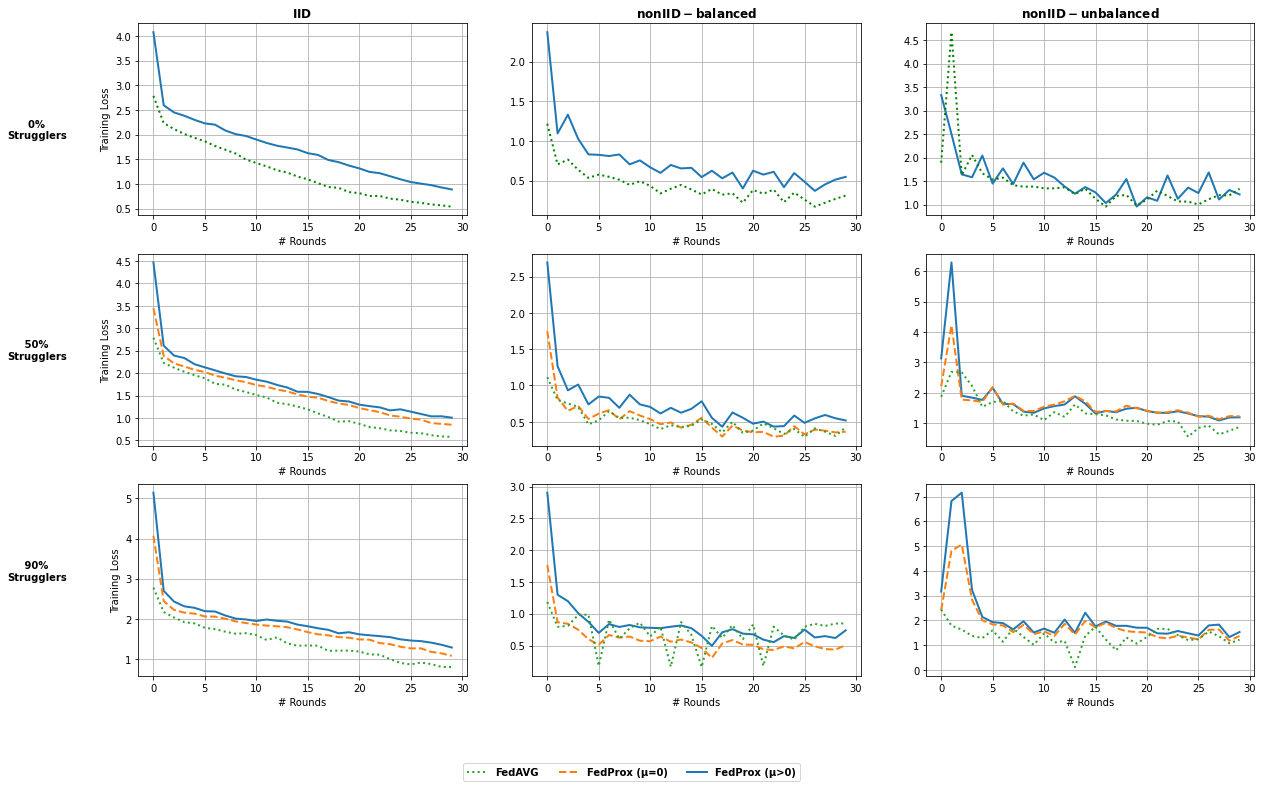

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(20, 12))

# 0% strugglers
ax[0][0].plot(range(len(fedProx_0_iid1_unbalance0_loss)), fedProx_0_iid1_unbalance0_loss, linewidth=2, linestyle='-')
# ax[0][0].plot(range(len()), , linewidth=2, linestyle='--')
ax[0][0].plot(range(len(fedAvg_0_iid1_unbalance0_loss)), fedAvg_0_iid1_unbalance0_loss, linewidth=2, linestyle=':', c='g')

ax[0][1].plot(range(len(fedProx_0_iid0_unbalance0_loss)), fedProx_0_iid0_unbalance0_loss, linewidth=2, linestyle='-')
# ax[0][1].plot(range(len()), , linewidth=2, linestyle='--')
ax[0][1].plot(range(len(fedAvg_0_iid0_unbalance0_loss)), fedAvg_0_iid0_unbalance0_loss, linewidth=2, linestyle=':', c='g')

ax[0][2].plot(range(len(fedProx_0_iid0_unbalance1_loss)), fedProx_0_iid0_unbalance1_loss, linewidth=2, linestyle='-')
# ax[0][2].plot(range(len()), , linewidth=2, linestyle='--')
ax[0][2].plot(range(len(fedAvg_0_iid0_unbalance1_loss)), fedAvg_0_iid0_unbalance1_loss, linewidth=2, linestyle=':', c='g')

# 50% strugglers
ax[1][0].plot(range(len(fedProx_50_iid1_unbalance0_loss)), fedProx_50_iid1_unbalance0_loss, linewidth=2, linestyle='-', label="FedProx (µ>0)")
ax[1][0].plot(range(len(fedProx0_50_iid1_unbalance0_loss)), fedProx0_50_iid1_unbalance0_loss, linewidth=2, linestyle='--', label="FedProx (µ=0)")
ax[1][0].plot(range(len(fedAvg_50_iid1_unbalance0_loss)), fedAvg_50_iid1_unbalance0_loss, linewidth=2, linestyle=':', label="FedAVG")

ax[1][1].plot(range(len(fedProx_50_iid0_unbalance0_loss)), fedProx_50_iid0_unbalance0_loss, linewidth=2, linestyle='-')
ax[1][1].plot(range(len(fedProx0_50_iid0_unbalance0_loss)), fedProx0_50_iid0_unbalance0_loss, linewidth=2, linestyle='--')
ax[1][1].plot(range(len(fedAvg_50_iid0_unbalance0_loss)), fedAvg_50_iid0_unbalance0_loss, linewidth=2, linestyle=':')

ax[1][2].plot(range(len(fedProx_50_iid0_unbalance1_loss)), fedProx_50_iid0_unbalance1_loss, linewidth=2, linestyle='-')
ax[1][2].plot(range(len(fedProx0_50_iid0_unbalance1_loss)), fedProx0_50_iid0_unbalance1_loss, linewidth=2, linestyle='--')
ax[1][2].plot(range(len(fedAvg_50_iid0_unbalance1_loss)), fedAvg_50_iid0_unbalance1_loss, linewidth=2, linestyle=':')

# 90% strugglers
ax[2][0].plot(range(len(fedProx_90_iid1_unbalance0_loss)), fedProx_90_iid1_unbalance0_loss, linewidth=2, linestyle='-')
ax[2][0].plot(range(len(fedProx0_90_iid1_unbalance0_loss)), fedProx0_90_iid1_unbalance0_loss, linewidth=2, linestyle='--')
ax[2][0].plot(range(len(fedAvg_90_iid1_unbalance0_loss)), fedAvg_90_iid1_unbalance0_loss, linewidth=2, linestyle=':')

ax[2][1].plot(range(len(fedProx_90_iid0_unbalance0_loss)), fedProx_90_iid0_unbalance0_loss, linewidth=2, linestyle='-')
ax[2][1].plot(range(len(fedProx0_90_iid0_unbalance0_loss)), fedProx0_90_iid0_unbalance0_loss, linewidth=2, linestyle='--')
ax[2][1].plot(range(len(fedAvg_90_iid0_unbalance0_loss)), fedAvg_90_iid0_unbalance0_loss, linewidth=2, linestyle=':')

ax[2][2].plot(range(len(fedProx_90_iid0_unbalance1_loss)), fedProx_90_iid0_unbalance1_loss, linewidth=2, linestyle='-')
ax[2][2].plot(range(len(fedProx0_90_iid0_unbalance1_loss)), fedProx0_90_iid0_unbalance1_loss, linewidth=2, linestyle='--')
ax[2][2].plot(range(len(fedAvg_90_iid0_unbalance1_loss)), fedAvg_90_iid0_unbalance1_loss, linewidth=2, linestyle=':')


# plt.suptitle('FedProx vs FedAVG')

ax[0][0].grid()
ax[0][1].grid()
ax[0][2].grid()
ax[1][0].grid()
ax[1][1].grid()
ax[1][2].grid()
ax[2][0].grid()
ax[2][1].grid()
ax[2][2].grid()

ax[0][0].title.set_text(r"$\bf{" + "IID" + "}$")
ax[0][1].title.set_text(r"$\bf{" + "non IID - balanced" + "}$")
ax[0][2].title.set_text(r"$\bf{" + "non IID - unbalanced" + "}$")

ax[0][0].set_ylabel('Training Loss')
ax[1][0].set_ylabel('Training Loss')
ax[2][0].set_ylabel('Training Loss')

ax[0][0].set_xlabel('# Rounds')
ax[0][1].set_xlabel('# Rounds')
ax[0][2].set_xlabel('# Rounds')
ax[1][0].set_xlabel('# Rounds')
ax[1][1].set_xlabel('# Rounds')
ax[1][2].set_xlabel('# Rounds')
ax[2][0].set_xlabel('# Rounds')
ax[2][1].set_xlabel('# Rounds')
ax[2][2].set_xlabel('# Rounds')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend([lines[2], lines[1], lines[0]], [labels[2], labels[1], labels[0]], loc='lower center', ncol=3, prop={'weight':'bold'})

plt.annotate('     90%\nStrugglers', xy=(-2.8, 0.5), xycoords='axes fraction', weight="bold")
plt.annotate('     50%\nStrugglers', xy=(-2.8, 1.65), xycoords='axes fraction', weight="bold")
plt.annotate('      0%\nStrugglers', xy=(-2.8, 2.8), xycoords='axes fraction', weight="bold")

plt.savefig("fedProx_results/loss_summary.png")

plt.show()